In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [264]:
#train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
#test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
train = pd.read_csv("/Users/slackoverflow/stats/kaggle/titanic/cleaned_train.csv")
test = pd.read_csv("/Users/slackoverflow/stats/kaggle/titanic/cleaned_test.csv")
comb = pd.read_csv("/Users/slackoverflow/stats/kaggle/titanic/TitanicCleanedCombined.csv")

In [71]:
train.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Surname          0
Family.Size      0
FamilyId         0
FamilyId2        0
dtype: int64

In [72]:
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

#### Handling nominal data via mapping

In [43]:
(train['Embarked'].unique())

array(['S', 'C', 'Q', nan], dtype=object)

In [44]:
test = train.copy()

In [53]:
def nominal_mapping(df, colname):
    class_mapping = {label:idx for idx,label in enumerate(df[colname].unique()) if type(label) is not float
    }
    return class_mapping
    
def map_column(df,colname):
    class_mapping = nominal_mapping(df,colname) 
    
    df[colname] = df[colname].map(class_mapping)
    
    print("Column \"{}\" of your data frame has been mapped using the following mapping: {}".format(colname,
                                                                                               class_mapping))

#### Finally map the data

In [51]:
map_column(test,"Embarked")
test["Embarked"].unique()

Column "Embarked" of your data frame has been mapped using the following mapping: {0: 0.0, 1: 1.0, 2: 2.0}


array([ 0.,  1.,  2.])

#### Replace NaNs with sklearn's Imputer function

In [49]:
def imputed_data(df, colname, strategy="mean"):
    from sklearn.preprocessing import Imputer
    imr = Imputer(missing_values="NaN", strategy=strategy, axis=0)
    imr = imr.fit(df[colname].reshape(-1,1))
    imputed_data = imr.transform(df[colname].values.reshape(-1,1))
    df[colname] = imputed_data
    print("Data has been imputed to \"{}\"".format(colname))

imputed_data(test,"Embarked","most_frequent")
test["Embarked"].unique()

Data has been imputed to "Embarked"


array([ 0.,  1.,  2.])

## Using sci-kit learn LabelEncoder class instead

    Note that the fit_transform method is just a shortcut for calling fit and transform separately, and we can use the inverse_transform method to transform the integer class labels back into their original string representation 

In [59]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()

#Make sure that there is no NaNs within the column you want transformed!!!
y = class_le.fit_transform(train["Sex"].values)
y[1:10], class_le.inverse_transform(y)[1:10] #Displaying first 10 values of each variable

(array([0, 0, 0, 1, 1, 1, 1, 0, 0]),
 array(['female', 'female', 'female', 'male', 'male', 'male', 'male',
        'female', 'female'], dtype=object))

### A learning algorithm will now assume that male is larger than female. Although this assumption is incorrect, the algorithm could still produce useful results. However, those results would not be optimal. 

## To avoid this, use either sci-kits' "OneHotEncoder" or Pandas' `get_dummies` method

In [255]:
#Pandas' get dummy even ignores NaNs
pd.get_dummies(train[["Sex", "Embarked"]]).head(1)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0


In [274]:
train.head(1)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Family.Size,FamilyId,FamilyId2
0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,Braund,2,Small,Small


In [288]:
X = pd.get_dummies(train[["PassengerId", "Pclass", "Sex", "Age", "SibSp",
                 "Parch", "Fare", "Embarked", "Title", "Surname", "Family.Size", "FamilyId2"]])

Test = pd.get_dummies(test[["PassengerId", "Pclass", "Sex", "Age", "SibSp",
                 "Parch", "Fare", "Embarked", "Title", "Surname", "Family.Size", "FamilyId2"]])

## Need same amount of features, so will use `get_dummies` on the combined data set from R, and do the split with R afterwards

In [270]:
combined = pd.get_dummies(comb[["PassengerId", "Pclass", "Sex", "Age", "SibSp",
                 "Parch", "Fare", "Embarked", "Title", "Surname", "Family.Size", "FamilyId2"]])

pd.DataFrame.to_csv(combined,"/Users/slackoverflow/stats/kaggle/titanic/PyCombined")

## After splitting Data in R, load it back to Python

In [315]:
TrainK = pd.read_csv("/Users/slackoverflow/stats/kaggle/titanic/PyTrain.csv")
TestK = pd.read_csv("/Users/slackoverflow/stats/kaggle/titanic/PyTest.csv")
print(TrainK.shape, TestK.shape)

(891, 923) (418, 923)


## 


,Unnamed: 0,X,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family.Size,Sex_female,...,Surname_Wittevrongel,Surname_Woolner,Surname_Wright,Surname_Yasbeck,Surname_Young,Surname_Youseff,Surname_Yousif,Surname_Yousseff,Surname_Yrois,Surname_Zabour
0,1,0,1,3,22.0,1,0,7.2500,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,2,1,38.0,1,0,71.2833,2,1,...,0,0,0,0,0,0,0,0,0,0
2,3,2,3,3,26.0,0,0,7.9250,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,3,4,1,35.0,1,0,53.1000,2,1,...,0,0,0,0,0,0,0,0,0,0
4,5,4,5,3,35.0,0,0,8.0500,1,0,...,0,0,0,0,0,0,0,0,0,0


In [424]:
X_train, X_test, y_train, y_test = train_test_split(TrainK.values,train["Survived"].values, test_size=.3, random_state=0)

## Regular Decision Tree

In [422]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

from sklearn.datasets import make_blobs
#X_train, y_train = make_blobs(n_samples=623, n_features=713, centers=100, random_state=0)



decision = DecisionTreeClassifier(criterion="gini", max_depth=None, random_state=0)
decision.fit(X_train, y_train)
y_pred = decision.predict(TestK)
#print('Misclassified samples: %d' % (y_test != y_pred).sum())
#print('Accuracy: %.2f' % accuracy_score(y_test, y_pred, normalize=True))
#print("Alternativ test accuracy:", decision.score(X_test, y_test))

#scores = cross_val_score(decision, X_train, y_train)
#scores.mean()   

submission(TestK, y_pred, name="RDTupdated.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Random Forest

In [426]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion="gini", 
                            max_depth=None, min_samples_split=1,random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(TestK)
print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))


#print('Misclassified samples: %d' % (y_test != y_pred).sum())


scores = cross_val_score(rf, X_train, y_train)
print(scores.mean())
submission(TestK, y_pred, name="ForestUpdatedGini.csv")

Training accuracy: 1.0
Test accuracy: 0.839552238806
0.815480614394


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Extremly Randomized Trees
    this one led to .8134 in kaggle with training set splitted 70:30

In [431]:
from sklearn.ensemble import ExtraTreesClassifier

ert = ExtraTreesClassifier(n_estimators=100, criterion="entropy", max_depth=None, min_samples_split=1,random_state=0)
ert.fit(X_train, y_train)
y_pred = ert.predict(TestK)
#print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Training accuracy:' , ert.score(X_train, y_train))
print('Test accuracy:' , ert.score(X_test, y_test))

scores = cross_val_score(ert, X_train, y_train)
print(scores.mean())

submission(TestK, y_pred, name="ERDupdate.csv")

Training accuracy: 1.0
Test accuracy: 0.839552238806
0.825080515298


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Logistic regression

In [207]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))
print('Training accuracy:' , lr.score(X_train, y_train))

Training accuracy: 0.804173354735
Test accuracy: 0.794776119403
Training accuracy: 0.804173354735


#### Standardize all the data now and repeat

In [428]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

#repeat logistic linear regression now
lr_std = LogisticRegression(penalty='l1', C=0.1)
lr_std.fit(X_train_std, y_train)
print('Training accuracy:', lr_std.score(X_train_std, y_train))
print('Test accuracy:', lr_std.score(X_test_std, y_test))
#print('Training-Accuracy: %.2f' % accuracy_score(y_test, y_pred))




#use L2 penalty now
print("\nUsing L2 penalty mode:\n")
lr_std_l2 = LogisticRegression(penalty='l2', C=0.1)
lr_std_l2.fit(X_train_std, y_train)
y_pred = lr_std_l2.predict(TestK)
print('Training accuracy:', lr_std_l2.score(X_train_std, y_train))
print('Test accuracy:', lr_std_l2.score(X_test_std, y_test))
submission(TestK, y_pred, name="LogisticRegression.csv")

Training accuracy: 0.959871589085
Test accuracy: 0.820895522388

Using L2 penalty mode:

Training accuracy: 0.991974317817
Test accuracy: 0.817164179104


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [175]:
export_graphviz(decision, out_file="regular_decision_tree_titanic.dot", 
                feature_names=None,filled=True, rounded=True, special_characters=True)

# Visualisations

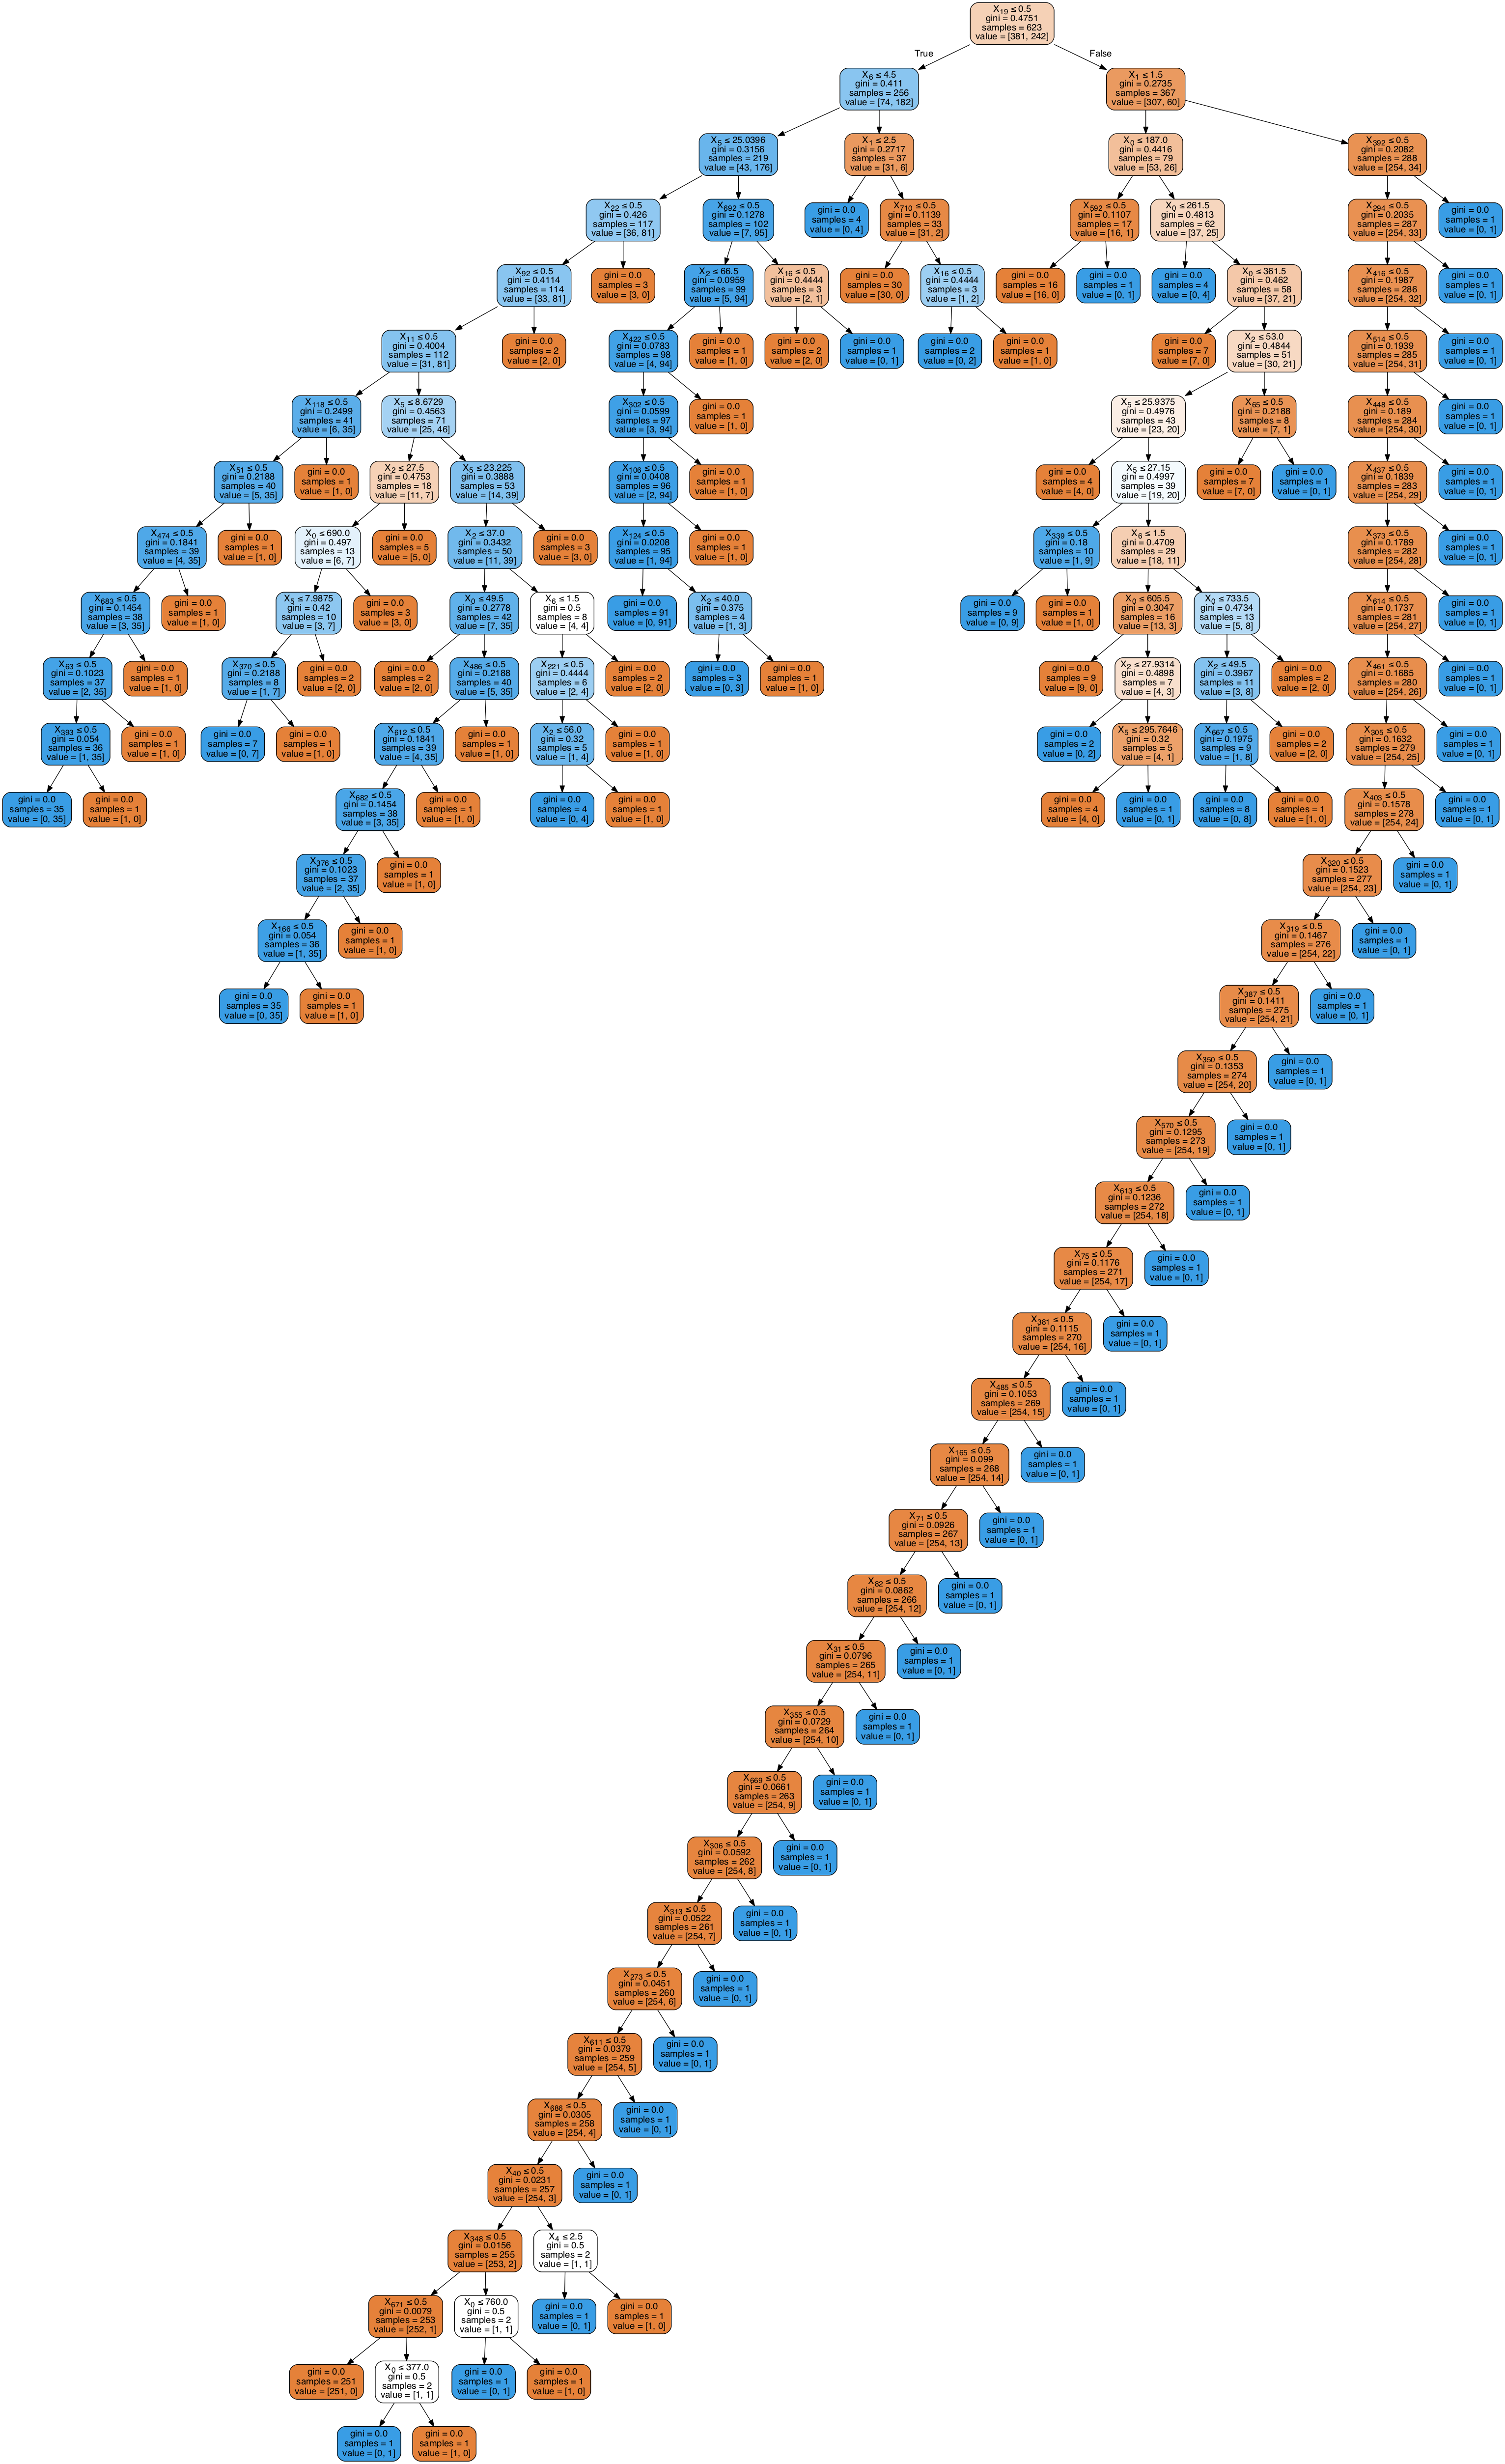

In [178]:
from IPython.display import Image
Image('regular_decision_tree_titanic.png')

# Prepare submission

In [313]:
def submission(df,pred, name="TitanicKaggle.csv"):
    sub = pd.DataFrame(df["PassengerId"])
    sub["Survived"] = pred
    pd.DataFrame.to_csv(sub,name, index=False)
    return sub.head()

In [296]:
z = y_pred.copy() 

In [305]:
pd.DataFrame.to_csv?

In [310]:
type(pd.DataFrame(TrainK["PassengerId"]))

pandas.core.frame.DataFrame

In [318]:
TestK

,Unnamed: 0,X,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family.Size,Sex_female,...,FamilyId2_5Palsson,FamilyId2_5Ryerson,FamilyId2_6Fortune,FamilyId2_6Panula,FamilyId2_6Rice,FamilyId2_6Skoog,FamilyId2_7Andersson,FamilyId2_7Asplund,FamilyId2_8Goodwin,FamilyId2_Small
0,892,891,892,3,34.500000,0,0,7.8292,1,0,...,0,0,0,0,0,0,0,0,0,1
1,893,892,893,3,47.000000,1,0,7.0000,2,1,...,0,0,0,0,0,0,0,0,0,1
2,894,893,894,2,62.000000,0,0,9.6875,1,0,...,0,0,0,0,0,0,0,0,0,1
3,895,894,895,3,27.000000,0,0,8.6625,1,0,...,0,0,0,0,0,0,0,0,0,1
4,896,895,896,3,22.000000,1,1,12.2875,3,1,...,0,0,0,0,0,0,0,0,0,1
5,897,896,897,3,14.000000,0,0,9.2250,1,0,...,0,0,0,0,0,0,0,0,0,1
6,898,897,898,3,30.000000,0,0,7.6292,1,1,...,0,0,0,0,0,0,0,0,0,1
7,899,898,899,2,26.000000,1,1,29.0000,3,0,...,0,0,0,0,0,0,0,0,0,1
8,900,899,900,3,18.000000,0,0,7.2292,1,1,...,0,0,0,0,0,0,0,0,0,1
9,901,900,901,3,21.000000,2,0,24.1500,3,0,...,0,0,0,0,0,0,0,0,0,1
